# **Problem Set 7**

Daniel de Castro 

October 29, 2021

# Part 1

### 1)

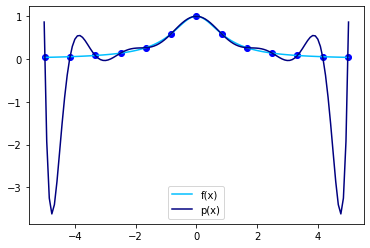

In [12]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

# Define x, f(x), and p(x)
x = np.linspace(-5, 5, 13)
f = lambda x: 1 / (1 + x * x)
p = lagrange(x, f(x))

# Configure plot
fig, ax = plt.subplots()

# Plot the data
plt.plot(x, f(x), 'bo')

# Plot the Lagrange polynomial
z = np.linspace(-5.02, 5.02, 120)
plt.plot(z, f(z), color="deepskyblue", marker=None, linestyle="solid", \
         label="f(x)")
plt.plot(z, p(z), color="navy", marker=None, linestyle="solid", label="p(x)")

# Add legend and show plot
ax.legend()
plt.show()


### 2)

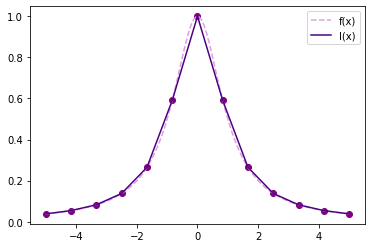

In [2]:
from scipy.interpolate import interp1d

# Define the piecewise linear interpolant 
l = interp1d(x, f(x))

# Configure plot
fig, ax = plt.subplots()

# Plot the data
plt.plot(x, f(x), color="purple", marker='o', linewidth=0)

# Plot the interpolant
plt.plot(z, f(z), color="plum", marker=None, linestyle="dashed", label="f(x)")
plt.plot(x, l(x), color="indigo", marker=None, linestyle="solid", label="l(x)")

# Add legend and show plot
ax.legend()
plt.show()

### 3)

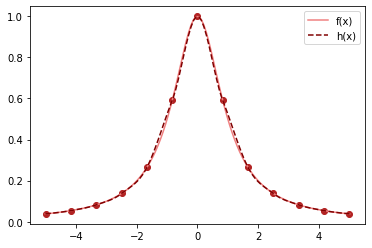

In [11]:
from scipy.misc import derivative

# Create a function to find the polynomial for the range [x_0, x_1]
def leg(x_0, x_1, f_0, f_1, fp_0, fp_1):
  h = x_1 - x_0
  return lambda x: ((-1 * fp_0) / h) * ((x - x_1)**2 / 2 - h**2 / 2) \
  + (fp_1 * (x - x_0)**2)/(2*h) + ((3/(h**2)) * (fp_0 + fp_1) + (6/(h**3)) \
  * (f_0 - f_1)) * (x-x_0)**2 * ((x-x_0)/(3) - (h/2)) + f_0

# Create a function that will return h(x), the cubic Hermite interpolant 
# evaluated at point x
def hermite(x, f):
  def herm(y):
    i = 0
    while (i < len(x) and y >= x[i]):
      i += 1
    
    if i >= len(x): 
      i = len(x) - 1

    return leg(x[i-1], x[i], f(x[i-1]), f(x[i]), derivative(f, x[i-1]), \
               derivative(f, x[i]))(y)
    
  return herm
  
# Find the cubic Hermite interpolant, and vectorize the function to work with 
# numpy arrays
h = np.vectorize(hermite(x, f))

# Configure plot
fig, ax = plt.subplots()

# Plot the data
plt.plot(x, f(x), color="firebrick", marker='o', linewidth=0)

# Plot the interpolant
plt.plot(z, f(z), color="lightcoral", marker=None, linestyle="solid", \
         label="f(x)")
plt.plot(z, h(z), color="maroon", marker=None, linestyle="dashed", label="h(x)")

# Add legend and show plot
ax.legend()
plt.show()

### 4)

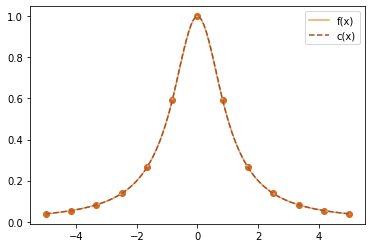

In [13]:
from scipy.interpolate import CubicSpline

# Define the cubic spline interpolant
c = CubicSpline(x, f(x))

# Configure plot
fig, ax = plt.subplots()

# Plot the data
plt.plot(x, f(x), color="chocolate", marker='o', linewidth=0)

# Plot the interpolant
plt.plot(z, f(z), color="sandybrown", marker=None, linestyle="solid", \
         label="f(x)")
plt.plot(z, c(z), color="sienna", marker=None, linestyle="dashed", label="c(x)")

# Add legend and show plot
ax.legend()
plt.show()

# Part 2

### Problem 9

First, we can find $P_1(x)$ using point slope form with the point (1, -1):

$$P_1(x) - P_1(1) = (-2/1)(x - 1)$$
$$P_1(x) = -2(x - 1) - 1$$
$$P_1(x) = -2x + 1$$

Now, in order for $P'(x)$ to be continuous at $x=1$, $P_1'(x) = -2 = P_2'(x)$. We also know that $P_2(1) = -1$ for $P(x)$ to be continuous at $x=1$, and that $P_2(2) = 0$. If we let $P_2(x) = ax^2 + bx + c$, then we have the following system of equations: 

$$A\vec{x} = \vec{b}$$

$$A = \begin{bmatrix} 1 & 1 & 1 \\ 4 & 2 & 1 \\ 2 & 1 & 0 \end{bmatrix}, \vec{x} = \begin{bmatrix} a \\ b \\ c \end{bmatrix}, \vec{b} = \begin{bmatrix} P_2(1) = -1 \\ P_2(2) = 0 \\ P'_2(1) = -2 \end{bmatrix}$$

Below, we solve this system of equations using numpy.

In [7]:
A = np.array([[1,1,1],[4,2,1],[2,1,0]])
b = np.array([-1,0,-2])

print(np.linalg.solve(A, b))

[ 3. -8.  4.]


Thus, 
$$P(x) = \begin{cases} -2x + 1 & 0 \leq x \leq 1 \\ 3x^2 - 8x + 4 & 1 \leq x \leq 2 \end{cases}$$

We plot $p(x)$ below.

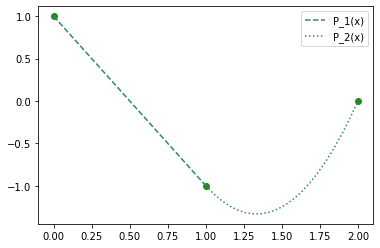

In [15]:
# Configure plot
fig, ax = plt.subplots()

# Plot the data
plt.plot([0,1,2], [1,-1,0], color="forestgreen", marker='o', linewidth=0)

# Plot the interpolant
x1 = np.linspace(0,1,20)
x2 = np.linspace(1,2,20)
plt.plot(x1, (lambda y: -2*y +1)(x1), color="seagreen", marker=None, \
         linestyle="dashed", label="P_1(x)")
plt.plot(x2, (lambda y: 3* y**2 -8*y +4)(x2), color="seagreen", marker=None, \
         linestyle="dotted", label="P_2(x)")

# Add legend and show plot
ax.legend()
plt.show()

### Problem 10

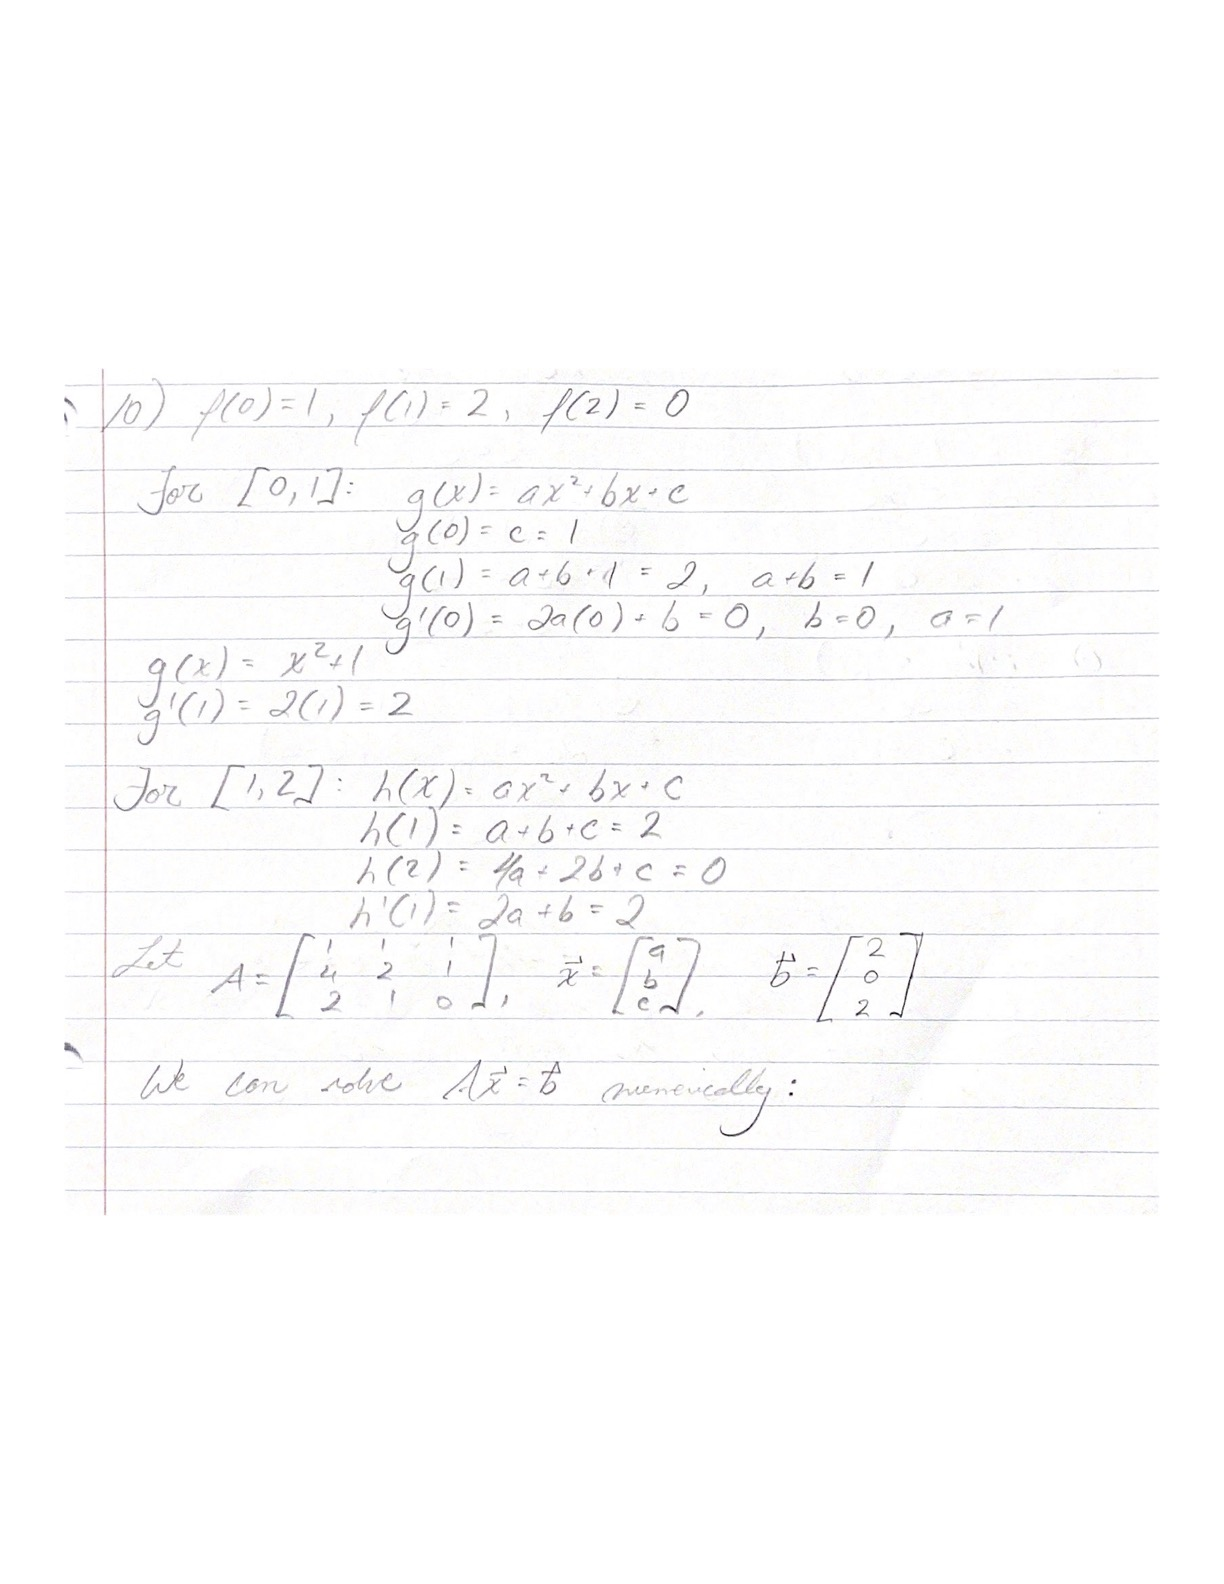

In [8]:
A = np.array([[1,1,1],[4,2,1],[2,1,0]])
b = np.array([2,0,2])

print(np.linalg.solve(A, b))

[-4. 10. -4.]


Thus, we find that 

$$r(x) = \begin{cases} x^2 + 1 & 0 \leq x \leq 1 \\ -4x^2 + 10x - 4 & 1 \leq x \leq 2 \end{cases}$$

This quadratic spline interpolant is plotted below.

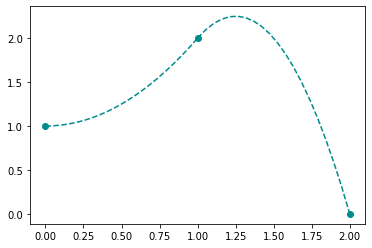

In [18]:
# Configure plot
fig, ax = plt.subplots()

# Plot the data
plt.plot([0,1,2], [1,2,0], color="darkcyan", marker='o', linewidth=0)

# Plot the interpolant
x1 = np.linspace(0,1,20)
x2 = np.linspace(1,2,20)
plt.plot(x1, (lambda y: y**2 +1)(x1), color="darkcyan", marker=None, \
         linestyle="dashed")
plt.plot(x2, (lambda y: -4* y**2 +10*y -4)(x2), color="darkcyan", marker=None, \
         linestyle="dashed")

# Add legend and show plot
plt.show()

### Problem 12

To show that $s(x)$ is a natural cubic spline through (0, 1), (1, 1), (2, 0), and (3, 10), we must show that s(x) satisfies three criteria: 


1.   $s(x)$ interpolates all of the nodes; 
2.   $s(x)$ has two continuous derivatives; 
3.   and $s''(x) = 0$ at each of the end nodes ($x = 0$ and $x=3$).

Below, we show that $s(x)$ interpolates all of the given nodes: 

$$s(0) = 1 + (0) - (0)^3 = 1$$
$$s(1) = 1 + (1) - (1)^3 = 1 - 2(1-1) - 3(1-1)^2 + 4(1-1)^3 = 1$$
$$s(2) = 1 - 2(2-1) - 3(2-1)^2 + 4(2-1)^3 = 4(2-2) + 9(2-2)^2 - 3(2-2)^3 = 0$$
$$s(3) = 4(3-2) + 9(3-2)^2 - 3(3-2)^3 = 10$$

In each of the intervals $[0, 1]$, $[1,2]$, and $[2, 3]$, s(x) is a polynomial of degree 2, and thus has two continuous derivatives. Below, we show that $s'(x)$ and $s''(x)$ are both defined and continuous at all of the nodes, and furthermore, that $s''(0) = s''(3) = 0$. 

Interval $[0,1]$: 

$s'(x) = 1 - 3x^2$

$s''(x) = -6x$

$s'(0) = 1$

$s''(0) = 0$

$s'(1) = -2$

$s''(1) = -6$

Interval $[1,2]$: 

$s'(x) = -2 - 6(x-1) + 12(x-1)^2$

$s''(x) = -6 + 24(x-1)$

$s'(1) = -2$ (matches result from previous interval)

$s''(1) = -6$ (matches result from previous interval)

$s'(2) = -2 - 6 + 12 = 4$

$s''(2) = 18$

Interval $[2,3]$: 

$s'(x) = 4 + 18(x - 2) - 9(x-2)^2$

$s''(x) = 18 - 18(x-2)$

$s'(2) = 4$ (matches result from previous interval)

$s''(2) = 18$ (matches result from previous interval)

$s'(3) = 13$

$s''(3) = 0$





### Problem 13

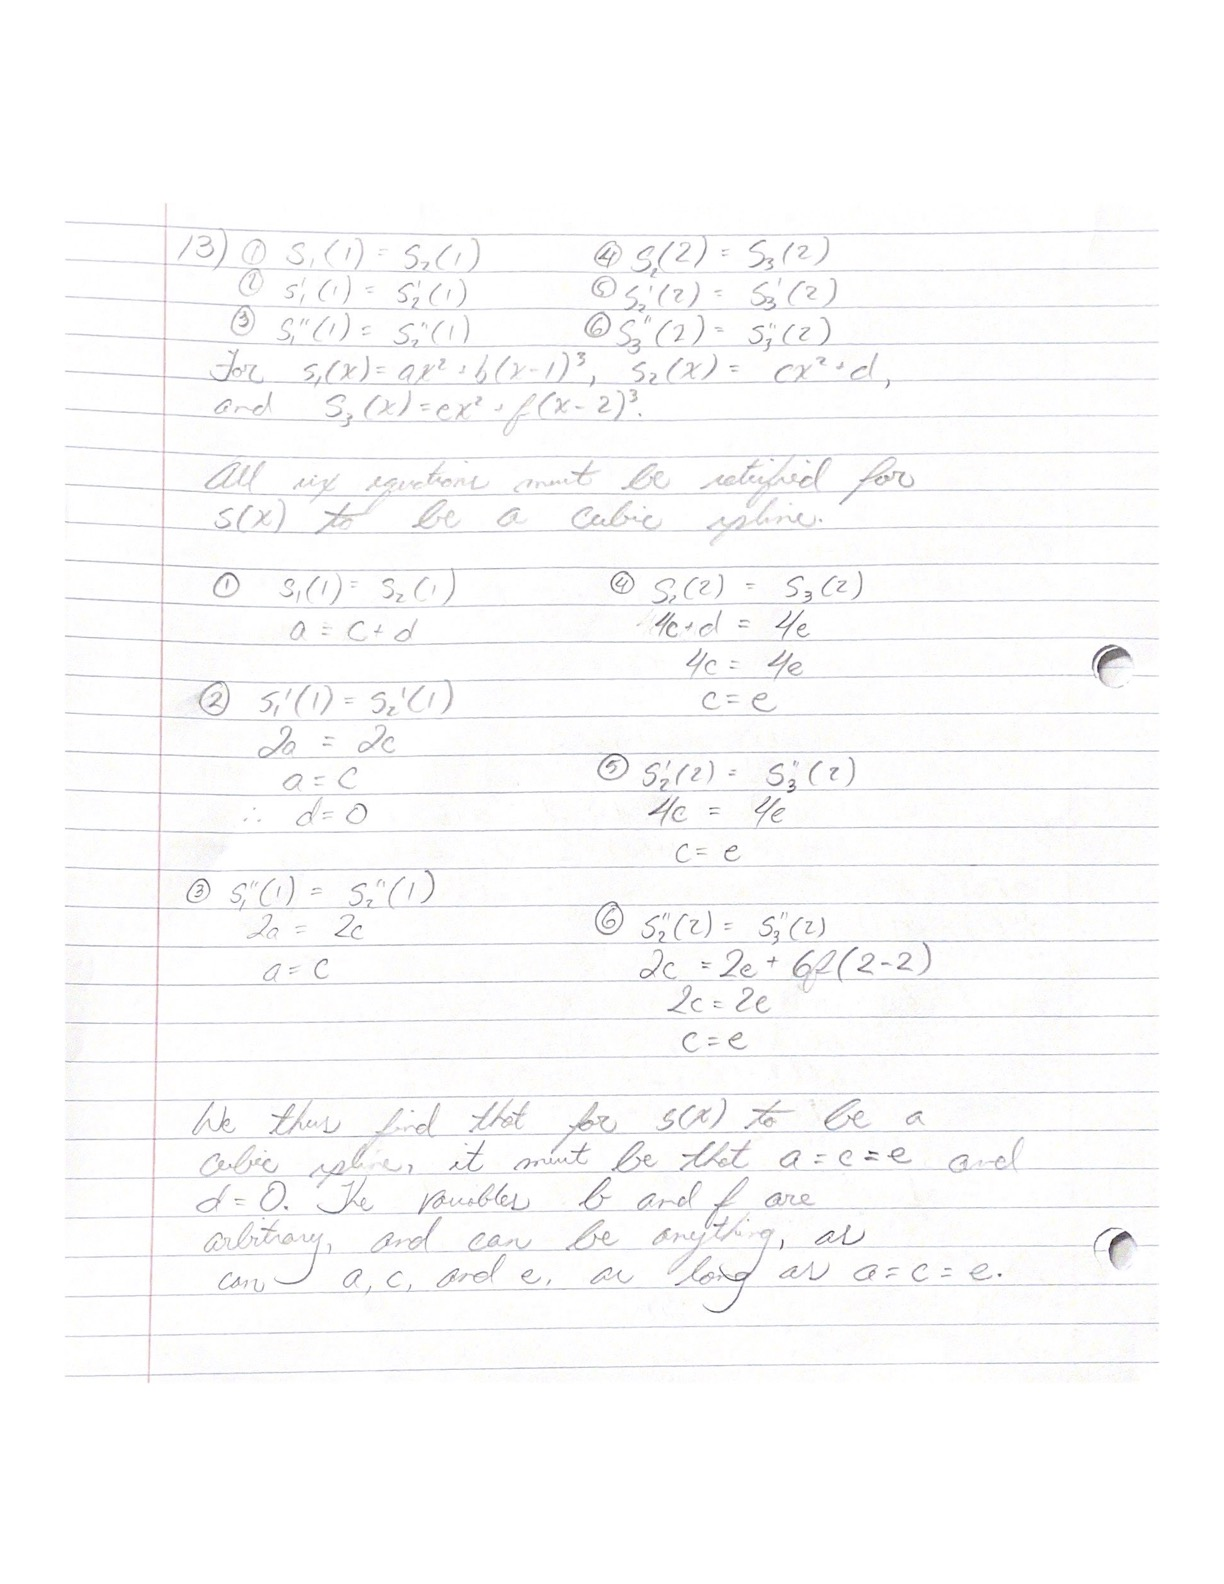